<a href="https://colab.research.google.com/github/naenumtou/dataScienceLab/blob/main/LeicaNFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Make connection to Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [2]:
# Change directory to Google Drive
%cd /content/drive/My Drive/Colab Notebooks/LeicaNFT

/content/drive/My Drive/Colab Notebooks/LeicaNFT


In [3]:
# Import libraries
import matplotlib.pyplot as plt
import random
import os

from PIL import Image

# Config
%config InlineBackend.figure_format = 'retina' #Retina display

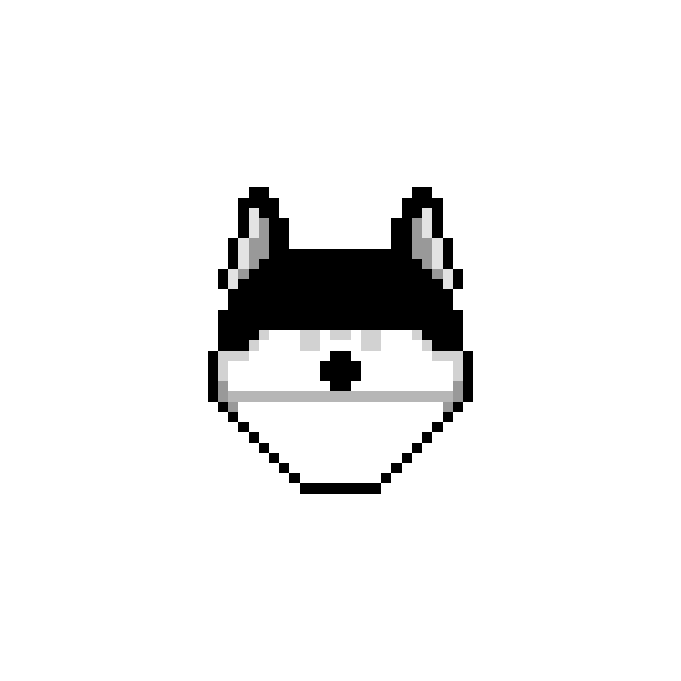

In [4]:
# Read sample NFT Part
plt.figure(figsize = (10, 6))
sample1 = Image.open(os.path.join(os.getcwd(), 'Base', 'Base.png')).convert('RGBA')
plt.imshow(sample1)
plt.axis('off')
plt.show()

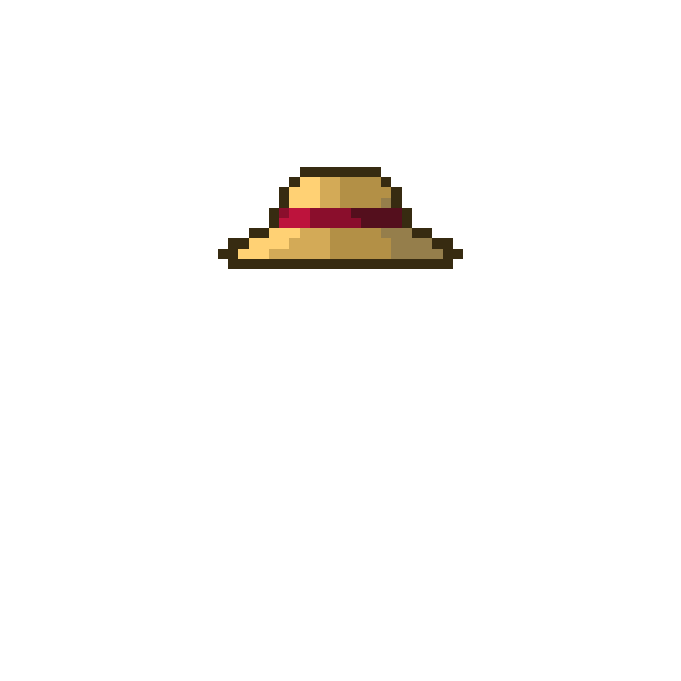

In [5]:
# Read sample NFT Part
plt.figure(figsize = (10, 6))
sample2 = Image.open(os.path.join(os.getcwd(), 'Accessories', 'Accessories4.png')).convert('RGBA')
plt.imshow(sample2)
plt.axis('off')
plt.show()

In [6]:
# Define weights on each part
background = [
    'Pink',
    'Blue',
    'Green',
    'Yellow'
] #Just names
backgroundWeights = [25, 25, 25, 25] #100% in total

eyes = [
    'Normal',
    'Glasses',
    'Happy',
    'Thnking'
] 
eyesWeights = [25, 25, 25, 25]

mount = [
    'Laugh',
    'COVID',
    'Hungry',
    'Smile'
] 
mountWeights = [25, 25, 25, 25]

accessories = [
    'Collar',
    'Headphones',
    'Necklace',
    'Hat',
] 
accessoriesWeights = [25, 25, 25, 25]

In [7]:
# Create dictionary to map file names 
backgroundFiles = {
    'Pink': 'Background1',
    'Blue': 'Background2',
    'Green': 'Background3',
    'Yellow': 'Background4'
}

eyesFiles = {
    'Normal': 'Eyes1',
    'Glasses': 'Eyes2',
    'Happy': 'Eyes3',
    'Thnking': 'Eyes4'
}

mountFiles = {
    'Laugh': 'Mount1',
    'COVID': 'Mount2',
    'Hungry': 'Mount3',
    'Smile': 'Mount4'
}

accessoriesFiles = {
    'Collar': 'Accessories1',
    'Headphones': 'Accessories2',
    'Necklace': 'Accessories3',
    'Hat': 'Accessories4'
}

In [8]:
# Number of NFT
TOTAL_IMAGES = 16
allImages = []

# Define function for unique NFT
def createCombination():
  newImage = {}
  newImage['Background'] = random.choices(background, backgroundWeights)[0]
  newImage['Base'] = 'Base' #Add base image
  newImage['Eyes'] = random.choices(eyes, eyesWeights)[0]
  newImage['Mount'] = random.choices(mount, mountWeights)[0]
  newImage['Accessories'] = random.choices(accessories, accessoriesWeights)[0]
  # For unique
  if newImage in allImages:
    return createCombination()
  else:
    return newImage

In [9]:
# Generate the unique combinations
for _ in range(TOTAL_IMAGES):
  NFT = createCombination()
  allImages.append(NFT)
    
# Add token Id to each image
i = 0
for item in allImages:
  item['TokenID'] = i
  i += 1  

In [10]:
# Generate Images
NFT_RESULT = []

for item in allImages:
  bg = Image.open(
      os.path.join(os.getcwd(), 'Background', f'{backgroundFiles[item["Background"]]}.png')
  ).convert('RGBA')
  base = Image.open(
      os.path.join(os.getcwd(), 'Base', 'Base.png')
  ).convert('RGBA')
  ey = Image.open(
      os.path.join(os.getcwd(), 'Eyes', f'{eyesFiles[item["Eyes"]]}.png')
  ).convert('RGBA')
  mo = Image.open(
      os.path.join(os.getcwd(), 'Mount', f'{mountFiles[item["Mount"]]}.png')
  ).convert('RGBA')
  acc = Image.open(
      os.path.join(os.getcwd(), 'Accessories', f'{accessoriesFiles[item["Accessories"]]}.png')
  ).convert('RGBA')
  # Composite
  com1 = Image.alpha_composite(bg, base)
  com2 = Image.alpha_composite(com1, ey)
  com3 = Image.alpha_composite(com2, mo)
  com4 = Image.alpha_composite(com3, acc)
  # To RGB
  com4RGB = com4.convert('RGB')
  NFT_RESULT.append(com4RGB)

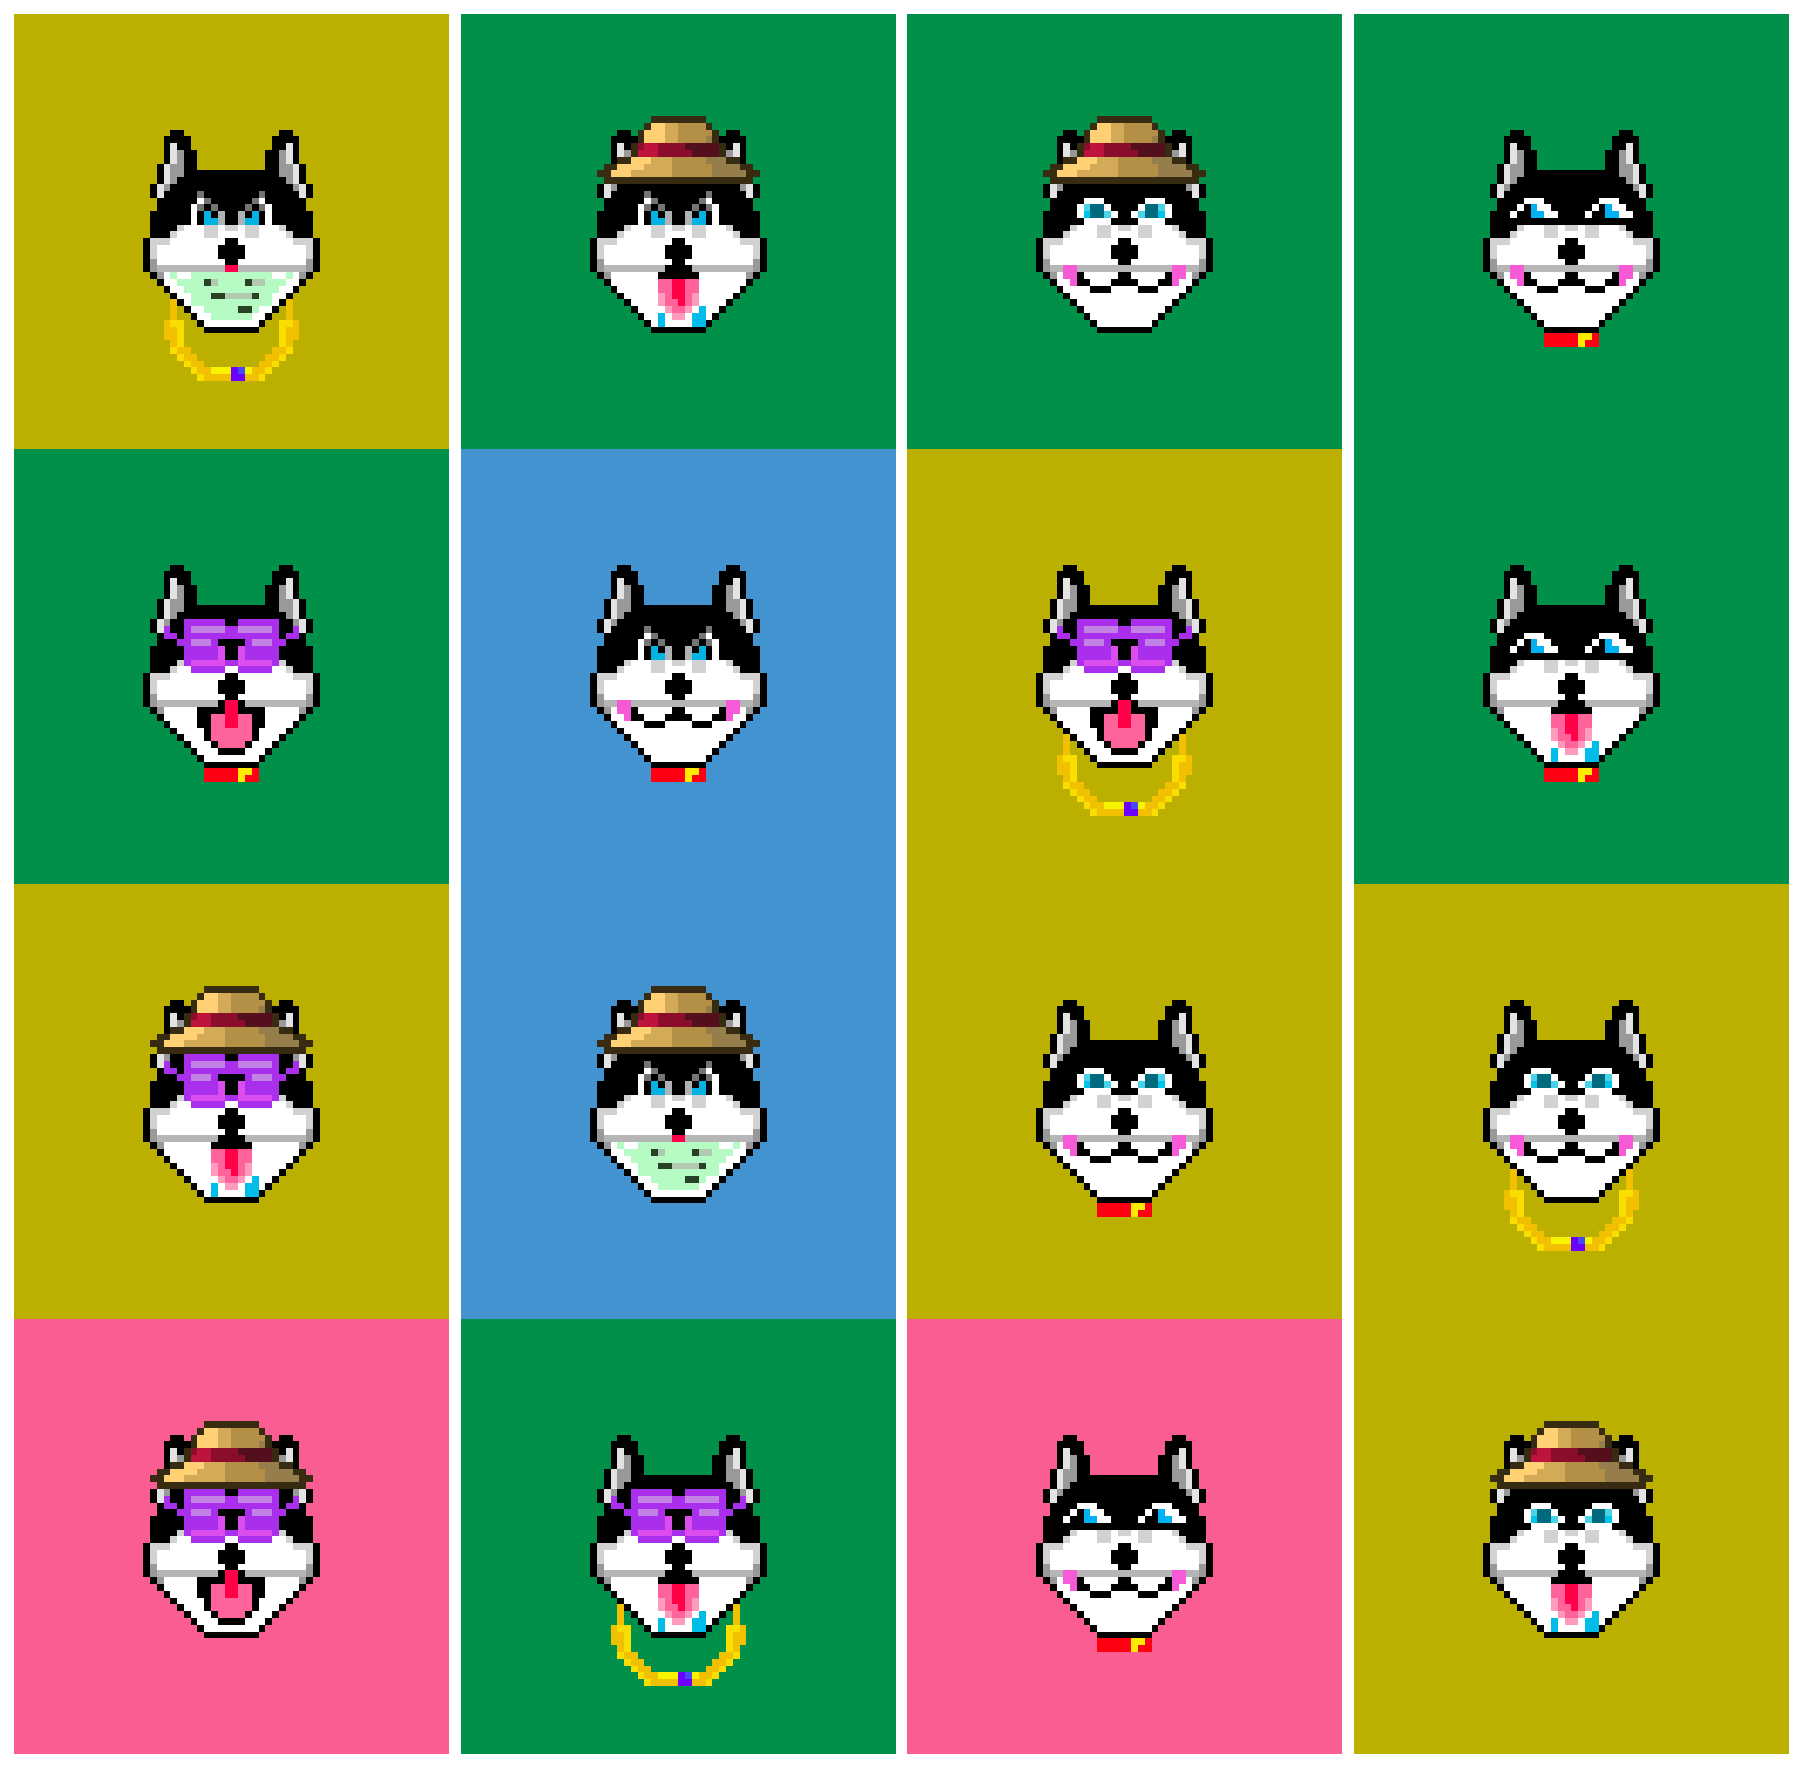

In [11]:
# Show NFT Images
fig, axs = plt.subplots(4, 4, figsize = (16, 16))
axs = axs.ravel()
for i, img in enumerate(NFT_RESULT):
  axs[i].imshow(img)
  axs[i].axis('off')
fig.subplots_adjust(wspace = 0, hspace = 0)
plt.show()